# Introduction

The purpose of our workshop today is to learn the principles of gradient descent in simple linear regression models.

## Resources

* [Gradient Descent visualization](https://blog.skz.dev/gradient-descent): a great toolbox to see how it works.

# Gradient Descent

In this notebook, we will study some of the behavior of stochastic gradient descent, compare it to (full) gradient descent, and show how linear regression can be trained with it.

Let's write out again the explicit formula for the parameters of the linear model:

$$w = (X^TX)^{-1}X^Ty.$$

Here we can see an inversion of the matrix $X^TX$ — a very time-consuming operation when working with a large number of features. It is not difficult to calculate that the complexity of calculations is $O(d^3 + d^2l)$. When solving problems, such labor intensity is often prohibitive, so the parameters are searched by iterative methods, the cost of which is less. One of them is gradient descent.

Let's recall that in gradient descent, the parameter values at the next step are obtained from the parameter values at the current step by shifting towards the antigradient of the functional:

$$w^{(t+1)} = w^{(t)} - \eta_t \nabla Q(w^{(t)}),$$
where $\eta_t$ — gradient descent step length.

The formula for the gradient of the error function in the case of MSE is as follows:

$$\nabla Q(w) = -2X^Ty + 2X^TXw = 2X^T(Xw - y).$$

The complexity of calculations in this case $O(dl)$. Stochastic gradient descent differs from conventional gradient descent by replacing the gradient with an unbiased estimate over one or more objects. In this case, the complexity becomes $O(kd)$, where $k$ is the number of objects on which the gradient is estimated, $k << l$. This partly explains the popularity of stochastic optimization methods.

Today, we will try to implement a simple gradient descent by hand.

In [ ]:
# Generate data by hand
X = np.array([[1], [3], [2], [10], [4], [7], [8]])
y = np.array([[3, 9, 6, 30, 12, 21, 24]]).T

# Some random initialization
w1 = -3
w0 = 3

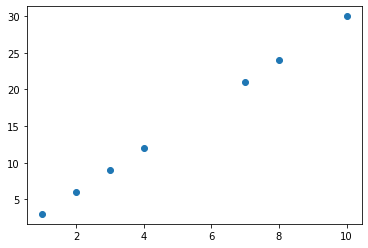

In [ ]:
plt.scatter(X,y)

In [ ]:
y_pred = w1 * X + w0

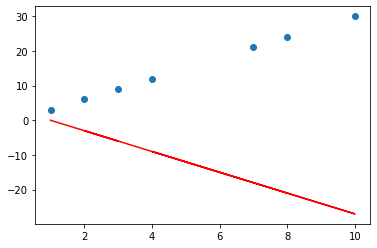

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

In [ ]:
# Current MSE:
np.mean(np.power(y - y_pred, 2))

1078.7142857142858

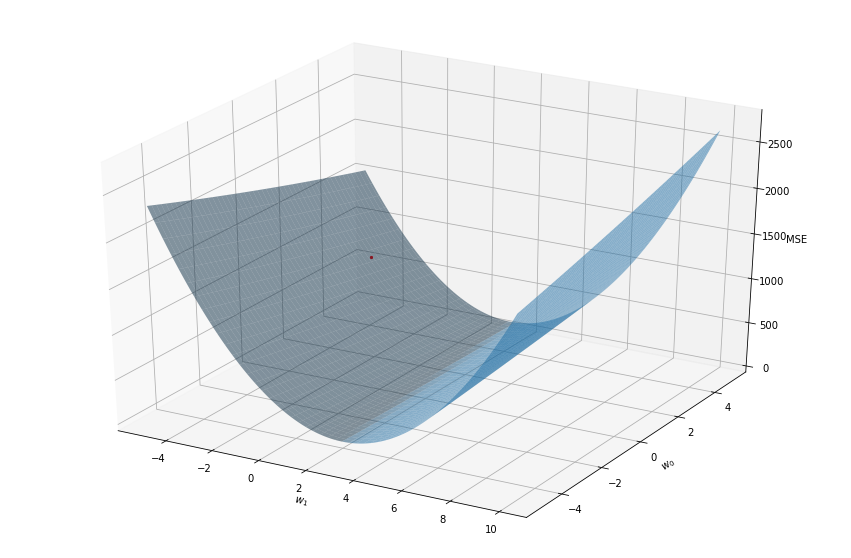

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

def MSE(w1, w0):
    y_pred = w1 * X[:, 0] + w0
    return np.mean((y - y_pred) ** 2)

coefs_w1 = np.linspace(-5, 10, num=100)
coefs_w0 = np.linspace(-5, 5, num=100)
w1s, w0s = np.meshgrid(coefs_w1, coefs_w0)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([MSE(i, j) for i, j in zip(np.ravel(w1s), np.ravel(w0s))])
Z = zs.reshape(w1s.shape)

ax.plot_surface(w1s, w0s, Z, alpha=.5)
ax.scatter(w1, w0, mse(w1, w0), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('MSE')

plt.show()

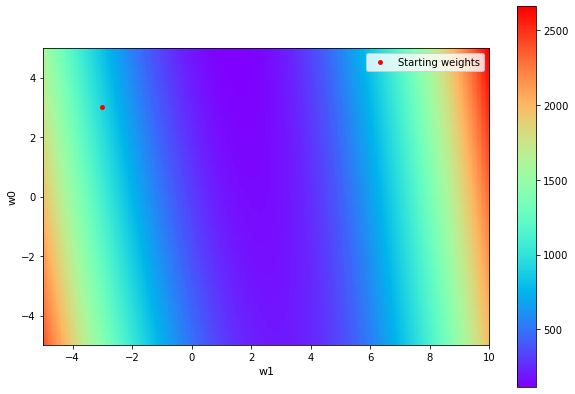

In [ ]:
coefs_w1 = np.linspace(-5, 10, num=100)
coefs_w0 = np.linspace(-5, 5, num=100)
w1s, w0s = np.meshgrid(coefs_w1, coefs_w0)

zs = np.array([round(MSE(i, j)) for i, j in zip(np.ravel(w1s), np.ravel(w0s))])
Z = zs.reshape(w1s.shape)

fig = plt.figure(figsize = (10,7))
plt.imshow(Z, extent=[-5,10, -5,5], origin = 'lower', cmap = 'rainbow', alpha = 1)
plt.colorbar()
plt.scatter(w1, w0, c='r', s=15, label='Starting weights')

plt.xlabel('w1', fontsize=11)
plt.ylabel('w0', fontsize=11)

plt.legend(loc="upper right");

Now define function to calculate MSE and gradient, using your data and weights as the input.

After that, calculate the new weights and make an assumption about them:

In [ ]:
# Define function for calculating MSE error
def MSError(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# Define function for calculating gradient
def Gradient(X, w1, w0, y):

    y_pred = w1 * X + w0

    grad_w1 = 2/len(y)*np.sum((y - y_pred) * (-X))
    grad_w0 = 2/len(y)*np.sum((y - y_pred)) * (-1)

    return grad_w1, grad_w0

In [ ]:
# Let's check the gradient
Gradient(X, w1, w0, y)

(-386.57142857142856, -54.0)

In [ ]:
# And obtain new weights
grad = Gradient(X, w1, w0, y)
w1_new = w1 - grad[0]
w0_new = w0 - grad[1]
print(w1, w0)
print(w1_new, w0_new)

-3 3
383.57142857142856 57.0


What's wrong with new weights? Think of what we need to change, and make a new strategy.

In [ ]:
lr = 0.01

grad = Gradient(X, w1, w0, y)
w1_new = w1 - lr * grad[0]
w0_new = w0 - lr * grad[1]

print(w1, w0)
print(w1_new, w0_new)

-3 3
0.8657142857142857 3.54


In [ ]:
# For visualization purposes we want to store our weights in a lsit
weights_1 = [w1]
weights_0 = [w0]

weights_1.append(w1_new)
weights_0.append(w0_new)

In [ ]:
y_pred = w1_new * X + w0_new
print(np.mean(np.power(y - y_pred, 2)))

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

95.10754985422741

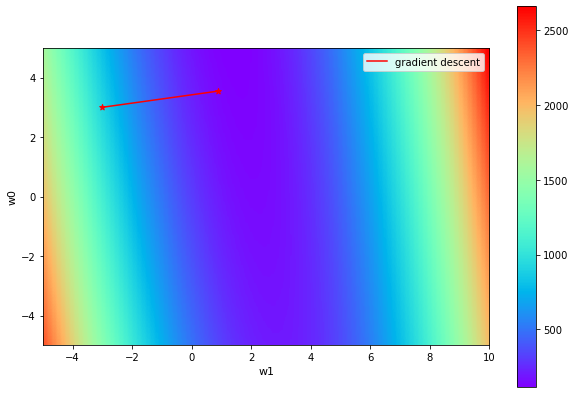

In [ ]:
coefs_w1 = np.linspace(-5, 10, num=100)
coefs_w0 = np.linspace(-5, 5, num=100)
w1s, w0s = np.meshgrid(coefs_w1, coefs_w0)

zs = np.array([round(MSE(i, j)) for i, j in zip(np.ravel(w1s), np.ravel(w0s))])
Z = zs.reshape(w1s.shape)

fig = plt.figure(figsize = (10,7))
plt.imshow(Z, extent=[-5,10, -5,5], origin = 'lower', cmap = 'rainbow', alpha = 1)
plt.colorbar()

plt.plot(weights_1, weights_0, label='gradient descent', c='r')
plt.scatter(weights_1, weights_0, marker='*', c='r')

plt.xlabel('w1', fontsize=11)
plt.ylabel('w0', fontsize=11)

plt.legend(loc="upper right");

Now let's run a couple of items:

In [ ]:
# Define number of steps
n = 100

# Run the same procedure n times
for i in range(n):
    cur_w1 = w1_new
    cur_w0 = w0_new
    grad = Gradient(X, w1_new, w0_new, y)

    w1_new = cur_w1 - lr * grad[0]
    w0_new = cur_w0 - lr * grad[1]

    weights_1.append(w1_new)
    weights_0.append(w0_new)

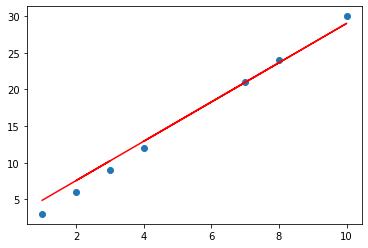

In [ ]:
y_pred = w1_new * X + w0_new
np.mean(np.power(y - y_pred, 2))

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

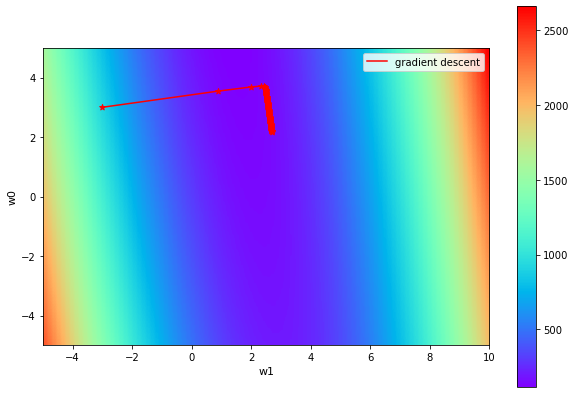

In [ ]:
coefs_w1 = np.linspace(-5, 10, num=100)
coefs_w0 = np.linspace(-5, 5, num=100)
w1s, w0s = np.meshgrid(coefs_w1, coefs_w0)

zs = np.array([round(MSE(i, j)) for i, j in zip(np.ravel(w1s), np.ravel(w0s))])
Z = zs.reshape(w1s.shape)

fig = plt.figure(figsize = (10,7))
plt.imshow(Z, extent=[-5,10, -5,5], origin = 'lower', cmap = 'rainbow', alpha = 1)
plt.colorbar()

plt.plot(weights_1, weights_0, label='gradient descent', c='r')
plt.scatter(weights_1, weights_0, marker='*', c='r')

plt.xlabel('w1', fontsize=11)
plt.ylabel('w0', fontsize=11)

plt.legend(loc="upper right");